# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
    * [assessment stage](#assessment)
    * [clean stage](#clean)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [12]:
# Import the required libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Setting the seed to get the same values every time
random.seed(42)

<a id='assessment'></a>
### Assessment_stage

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [13]:
# Import the data
df = pd.read_csv('ab_data.csv')
# Make a copy of the data o work on it
df_copy = df.copy()
# Get a glimpse of the date
df_copy.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [14]:
# Get the number of rows and columns
print(f"The number of rows are {df_copy.shape[0]}, and the number of columns are {df_copy.shape[1]}.\n")

The number of rows are 294478, and the number of columns are 5.



**c.** The number of unique users in the dataset.

In [15]:
# Get the number of unique users
print(f"The number of unique users are {df_copy['user_id'].nunique()}.\n")

The number of unique users are 290584.



**d.** The proportion of users converted.

In [16]:
# Get the proportion of users converted
print(np.round(df_copy.query("converted == 1").shape[0]/df_copy.shape[0], 4))

0.1197


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [17]:
# Get the number of times when the "group" is 'treatment' but "landing_page" is not a 'new_page'.
print(df_copy.query("group == 'treatment' & landing_page != 'new_page'").shape[0])
# Get the number of times when the "group" is 'control' but "landing_page" is not an 'old_page'.
print(df_copy.query("group == 'control' & landing_page != 'old_page'").shape[0])

1965
1928


**f.** Do any of the rows have missing values?

In [18]:
# Get some info concerning the null values for any columns
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


In [19]:
# Check for duplicate values for user_ids
df_copy[df_copy['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2656,698120,2017-01-15 17:13:42.602796,control,old_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0
7500,899953,2017-01-07 03:06:54.068237,control,new_page,0
8036,790934,2017-01-19 08:32:20.329057,treatment,new_page,0
10218,633793,2017-01-17 00:16:00.746561,treatment,old_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


<a id='clean'></a>

### Clean Stage

In [20]:
# Remove the inaccurate rows (treatment and old page)
index_1 = df_copy[(df_copy['group'] == 'treatment') & (df_copy['landing_page']=='old_page')].index
df_copy = df_copy.drop(index_1)
# Remove the inaccurate rows (control and new page)
index_2 = df_copy[(df_copy['group'] == 'control') & (df_copy['landing_page']=='new_page')].index
df_copy = df_copy.drop(index_2)

# Double Check all of the incorrect rows were removed from df_copy 
print(df_copy[((df_copy['group'] == 'treatment') == (df_copy['landing_page'] == 'new_page')) == False].shape[0])
print(df_copy[((df_copy['group'] == 'control') == (df_copy['landing_page'] == 'old_page')) == False].shape[0])

0
0


In [21]:
# Double check for the number of rows
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [22]:
# Check for the unique values
df_copy.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [23]:
# Check the duplicated row in "user_id" columns
print(df_copy[df_copy['user_id'].duplicated()]['user_id'])
# Display the duplicated rows
df_copy[df_copy['user_id'] == 773192]

2893    773192
Name: user_id, dtype: int64


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [24]:
# Remove the duplicated row (keep only one value)
df_copy.drop_duplicates(subset='user_id', keep='first', inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df_copy[df_copy['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [25]:
# Check again for the number of unique users
df_copy.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

**a.** What is the probability of an individual converting regardless of the page they receive?

In [26]:
np.round(df_copy[df_copy['converted']==1].shape[0]/df_copy.shape[0], 4)

0.1196

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [27]:
control_rate = df_copy[(df_copy['converted']==1) & (df_copy['group']=='control')].shape[0]/\
df_copy[df_copy['group']=='control'].shape[0]

control_rate

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [28]:
treatment_rate = df_copy[(df_copy['converted']==1) & (df_copy['group']=='treatment')].shape[0]/\
df_copy[df_copy['group']=='treatment'].shape[0]

treatment_rate

0.11880806551510564

In [29]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_rate - control_rate
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [30]:
df_copy[df_copy['landing_page']=='new_page'].shape[0]/df_copy.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

#### Interpretation

<p style="color:#1F618D">Apparently, there is no evidence yet to say that the `treatment` group users lead to more conversions as the conversion rate of `control` group is greater than the conversion rate of treatment group, Knowing that, the dataset is nearly well divided (50% of the observations recieved the old page and the other half recieved the new page.</p>

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<p style="color:#1F618D">Our case here is to test if the new (treatment) homepage have greater conversion rate than the older (control) page. So, we would list our hypothesis as follows:
                                $$H_0: \pi_{control} \geq \pi_{treatment}$$
                                $$H_1: \pi_{control} < \pi_{treatment}$$
</p>

### Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df_copy` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>



**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [31]:
# Since the null hypothesis states that the conversion rate for both treatment and control group are equal to
# the conversion rate for the whole dataset regardless of whether the landing page is old or new
# So the whole data set is used to get the proportion of conversion rate
p_pop = df_copy[df_copy['converted']==1].shape[0]/df_copy.shape[0]
# Then the p_new will equal to p_old and p_population
p_new = df_copy[df_copy['converted']==1].shape[0]/df_copy.shape[0]
p_old = df_copy[df_copy['converted']==1].shape[0]/df_copy.shape[0]

**b.** What is $n_{new}$, the number of individuals in the treatment group?

In [32]:
# Make a dataframe of treatment group
treatment_group = df_copy[df_copy['group']=='treatment']
# Get the number of treatment group
treatment_group.shape[0]

145310

**c.** What is $n_{old}$, the number of individuals in the control group?

In [33]:
# Make a dataframe of control group
control_group = df_copy[df_copy['group']=='control']
# Get the number of control group
control_group.shape[0]

145274

**d. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [34]:
# Simulate a Sample for the treatment Group
np.random.seed(42)
new_page_converted = np.random.choice([1,0],size=treatment_group.shape[0], p=[p_new, 1-p_new])
new_page_converted_prob = new_page_converted.mean()

**e. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [35]:
# Simulate a Sample for the control Group
np.random.seed(42)
old_page_converted = np.random.choice([1,0],size=control_group.shape[0], p=[p_old, 1-p_old])
old_page_converted_prob = old_page_converted.mean()

In [38]:
# number of individuals who were shown the old_page
n_old = len(df_copy.query('landing_page=="old_page"'))
# number of individuals who were shown the new_page
n_new = len(df_copy.query('landing_page=="new_page"'))

**f.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [36]:
prob_diff = new_page_converted_prob - old_page_converted_prob


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [37]:
# Sampling distribution 
np.random.seed(42)
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0],size=treatment_group.shape[0], p=[p_new, 1-p_new])
    new_page_converted_prob = new_page_converted.mean()
    old_page_converted = np.random.choice([1,0],size=control_group.shape[0], p=[p_old, 1-p_old])
    old_page_converted_prob = old_page_converted.mean()
    prob_diff = new_page_converted_prob - old_page_converted_prob
    p_diffs.append(prob_diff)

In [42]:
# Or we can make the Sampling distribution we with more quick method
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted 

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.

In [27]:
p_diffs = np.array(p_diffs)

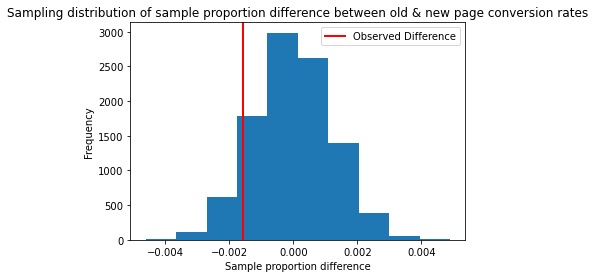

In [41]:
# Plotting the histogram
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r', linewidth=2, label='Observed Difference')

plt.xlabel('Sample proportion difference')
plt.ylabel('Frequency')
plt.title('Sampling distribution of sample proportion difference between old & new page conversion rates')
plt.legend()
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [29]:
# Calculating the p_value
p_val=(p_diffs > obs_diff).mean()
p_val

0.9065

#### Interpretation 

<p style="color:#1F618D">The value that was just computed in <b>part j</b> above is called <b><i>p_value</i></b> and this value states the probablity of finding a particular set of observation given our null hypothesis is true. So, this value means that around <b>90.65%</b> of our dataset would have a conversion rate for the control group that is apporximately equal to the conversion rate of treatment group, which indicates that we have not enough evidence to reject the null hypothesis at 5% error rate.</p>

Assuming the `ab_data` contains our population data, apparently, the treatment group has lower conversion rate than the control group. So, we will perform our hypothesis test to assure this point.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df_copy.query('converted == 1 & landing_page=="old_page"'))
# number of conversions with the new_page
convert_new = len(df_copy.query('converted == 1 & landing_page=="new_page"'))
# number of individuals who were shown the old_page
n_old = len(df_copy.query('landing_page=="old_page"'))
# number of individuals who were shown the new_page
n_new = len(df_copy.query('landing_page=="new_page"'))

C:\Users\mohammed hani\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest(count = np.array([convert_old, convert_new]),\
                               nobs = np.array([n_old, n_new]),\
                               alternative = 'smaller')

In [32]:
stat, pval

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### Interpretation

<p style="color:#1F618D">The <b><i>z-score</i></b> and <b><i>p-value</i></b> above indicate that we do not have sufficient evidence to reject <b>H<sub>0</sub></b>, since the <b><i>p-value</i></b> is greater than <b>5%</b> (error rate), which means that the old version of the webpage can have greater than or equal conversion rate than the new page.</p>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Answer

<p style="color:#1F618D">Logistic regression is the best type for this case, since we do not predict a value, instead, we try to predict whether the users will <b>convert</b> or not.</p>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# Make a new copy of our copied dataframe
df2 = df_copy.copy()
# Get the dummy variables for both landing page and group columns
df2[['treatment', 'control']] = pd.get_dummies(df2['group'])

In [35]:
df2.drop('treatment', axis=1, inplace=True)
df2 = df2.rename(columns={'control': 'ab_page'})

In [36]:
# Make an intercept
df2['intercept'] = 1

In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-11-19 15:30 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

c. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

#### Interpretation

<p style="color:#1F618D"> The <b><i>p-value</i></b> associated with <b>ab_page</b> is greater than <b>5%</b>, which indicates that the variable is insignificant in predicting whether the user will convert or not. So, the alternative hypothesis in this test indicates that the <b>ab_page</b> has no effect (neither positively or negatively) on the conversion state which presumes that it is a two-tailed test. On the other hand, the alternative hypothesis of <b>Part II</b> hypothesize if the old_page has less conversion rate than the new page, which presumes a one-tailed test.</p>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<p style="color:#1F618D"> Adding other factors or variables to the model can make it more stronger in predicting whether the people would convert or not, but some obstacles may hinder these advantage such as the rise of some issues such as <i> Multicollinearity</i> issue that arise when two or more variables that supposed to independent, are correlated with each other, which may provide misleading results.</p>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [64]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [65]:
# Extra: create dummy variables for workdays and weekends (weekend = 1, workday=0)
df_new['weekend'] = ((pd.DatetimeIndex(df_new['timestamp']).dayofweek) // 5 == 1).astype(int)

In [66]:
# Defining the unique values for country column
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [67]:
# Get a glimpse of the conversion rate for each country for both groups
df_new.groupby(['country', 'group'])['converted'].mean()

country  group    
CA       control      0.118783
         treatment    0.111902
UK       control      0.120022
         treatment    0.121171
US       control      0.120630
         treatment    0.118466
Name: converted, dtype: float64

#### Interpretation

<p style="color:#1F618D"> From the results above, the conversion rates for each country is different from each other except for the control groups for both <b>US</b> and <b>UK</b></p>

In [68]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [69]:
### Fit Linear Model And Obtain the Results
logit_model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'ab_page']])
results = logit_model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-11-19 19:56 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

#### Interpretation

<p style="color:#1F618D"> The <b><i>p-value</i></b> associated with all the variables included in the model are greater than <b>5%</b>, which indicates that the variables are insignificant in predicting whether the user will convert or not. So, the alternative hypothesis in this test indicates that the <b>ab_page, and the countries involved</b> have no effect (neither positively or negatively) on the conversion state.</p>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.

In [70]:
# We would get the interaction between the `ab_page` column and countries columns
df_new['ab_and_CA'] = df_new['ab_page'] * df_new['CA']
df_new['ab_and_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_and_US'] = df_new['ab_page'] * df_new['US']

In [71]:
# Fit Linear Model with the new variables
logit_model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'ab_page', 'ab_and_CA', 'ab_and_UK']])
results = logit_model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-11-19 19:56 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
ab_and_CA    -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
ab_and_UK     0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

<p style="color:#1F618D"> According to the <b><i>p-value</i></b> associated with each coeeficient in the model, the model is not significant enough to predict whether the user will convert or not.</p>

In [72]:
# Fit Linear Model with the new variables (adding the weekend dummy variable)
logit_model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'ab_page', 'ab_and_CA', 'ab_and_UK','weekend']])
results = logit_model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212784.6582
Date:               2022-11-19 19:57 BIC:              212858.7157
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           6                LL-Null:          -1.0639e+05
Df Residuals:       290577           LLR p-value:      0.28454    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9866    0.0102  -193.8576  0.0000  -2.0067  -1.9666
CA           -0.0175    0.0377    -0.4651  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3058  0.7598  -0.0426   0.0311
ab_page      -0.0206    0.0137    -1.5051  0.1323  -0.0473   0.0062
ab_and_CA    -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
ab_and_UK     0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
weekend       0.0006    0.0128     0.0453  0.9639  -0.0245   0.0257
==================================================================

"""

<a id='conclusions'></a>
## Conclusions
<br>
<div style="color:#1F618D">
    To conclude, our analysis have reached the following results:
    <ul>
        <li> The results of the sampling distribution of the sample proportions did not provide so much evidence to reject the H<sub>0</sub>, which means that the conversion rate for the control group that has been shown the old page can be greater than or equal to the conversion rate of the treatment group that has been shown the new page
        <li> Using regression modelling, the coefficients of the variables included in the model, which are the type of the <b>landing page</b> (new or old), the <b>country</b> of the users (United Kingdom, USA, or Canada), the interaction between the countries and the landing page, and the <b>weekend</b> columns, were not statistically significant enough to say that they have an effect on the <b>conversion</b> variable.      
    </ul>
</div>

### Resources helped in finishing the project

- <i>"Convert dataframe date row to a weekend / not weekend value"</i> https://stackoverflow.com/questions/32278728/convert-dataframe-date-row-to-a-weekend-not-weekend-value